# Get the IMOS HF Radar data

See: https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/028b9801-279f-427c-964b-0ffcdf310b59

In [11]:
%pip install imageio s3fs xarray dask cartopy cmocean matplotlib


Note: you may need to restart the kernel to use updated packages.


In [12]:

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dask

from s3fs import S3FileSystem, S3Map

In [13]:
# Access the AODN s3 bucket like this
fs = S3FileSystem(anon=True)
aodn = fs.ls('imos-data')
for item in aodn:
    print(item)

imos-data/AIMS
imos-data/Bureau_of_Meteorology
imos-data/CSIRO
imos-data/Charles_Darwin_University
imos-data/Curtin_University
imos-data/Deakin_University
imos-data/Defence_Technology_Agency-New_Zealand
imos-data/Department_for_Environment_and_Water-South_Australia
imos-data/Department_of_Defence
imos-data/Department_of_Environment_and_Science-Queensland
imos-data/Department_of_Planning_and_Environment-New_South_Wales
imos-data/Department_of_Transport-Western_Australia
imos-data/Derwent_Estuary_Program
imos-data/Flinders_University
imos-data/Future_Reef_MAP
imos-data/Gippsland-Ports-Victoria
imos-data/IMOS
imos-data/Macquarie_University
imos-data/NSW-OEH
imos-data/Pilbara_Ports_Authority
imos-data/Southern_Cross_University
imos-data/TERN
imos-data/UNSW
imos-data/UON
imos-data/UWA
imos-data/WAMSI
imos-data/aodn.js
imos-data/error.html
imos-data/index.html
imos-data/robots.txt


In [14]:
aodn = fs.ls('imos-data/IMOS')
for item in aodn:
    print(item)

imos-data/IMOS/AATAMS
imos-data/IMOS/ACORN
imos-data/IMOS/ACORN_JCU_historical
imos-data/IMOS/ANFOG
imos-data/IMOS/ANMN
imos-data/IMOS/AUV
imos-data/IMOS/Argo
imos-data/IMOS/BGC_DB
imos-data/IMOS/COASTAL-WAVE-BUOYS
imos-data/IMOS/DWM
imos-data/IMOS/FAIMMS
imos-data/IMOS/NTP
imos-data/IMOS/OceanCurrent
imos-data/IMOS/SAIMOS
imos-data/IMOS/SOOP
imos-data/IMOS/SRS
imos-data/IMOS/eMII


In [15]:
aodn = fs.ls('imos-data/IMOS/ACORN')
for item in aodn:
    print(item)

imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC
imos-data/IMOS/ACORN/gridded_1h-avg-wave-site-map_QC
imos-data/IMOS/ACORN/gridded_1h-avg-wave-spectra_QC
imos-data/IMOS/ACORN/gridded_1h-avg-wave-station-map_QC
imos-data/IMOS/ACORN/gridded_1h-avg-wind-map_QC
imos-data/IMOS/ACORN/radial
imos-data/IMOS/ACORN/radial_quality_controlled
imos-data/IMOS/ACORN/vector


In [16]:
aodn = fs.ls('imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC')
aodn = fs.ls('imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC')

for item in aodn:
    print(item)

imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/BONC
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/CBG
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/COF
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/CORL
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NEWC
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/ROT
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/SAG
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/TURQ


In [17]:
# aodn = fs.ls('imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/ROT/2019/05/01')
aodn = fs.ls('imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA')

for item in aodn:
    print(item)

imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2021
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2022
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2023
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2024
imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2025


In [18]:
# === 按月份收集 NWA 区域指定月份的所有小时级 nc 文件 ===
YEAR   = 2025
MONTHS = [8, ]   # 想下哪几个月就填哪几个月
REGION = "NWA"
QC_DIR = "gridded_1h-avg-current-map_non-QC"   # 如需 QC 版，改成 "gridded_1h-avg-current-map_QC"

ncfiles = []
for mm in MONTHS:
    pattern = f"imos-data/IMOS/ACORN/{QC_DIR}/{REGION}/{YEAR:04d}/{mm:02d}/*/*.nc"
    found = fs.glob(pattern)
    print(f"{YEAR}-{mm:02d}: {len(found)} files")
    ncfiles += found

print("TOTAL files:", len(ncfiles))
print("SAMPLE:", ncfiles[:3])


2025-08: 232 files
TOTAL files: 232
SAMPLE: ['imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2025/08/01/IMOS_ACORN_V_20250801T003000Z_NWA_FV00_1-hour-avg.nc', 'imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2025/08/01/IMOS_ACORN_V_20250801T013000Z_NWA_FV00_1-hour-avg.nc', 'imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2025/08/01/IMOS_ACORN_V_20250801T023000Z_NWA_FV00_1-hour-avg.nc']


In [19]:
fileobj = fs.open(ncfiles[0])
ds = xr.open_dataset(fileobj)
ds

<xarray.Dataset> Size: 102kB
Dimensions:               (TIME: 1, LATITUDE: 51, LONGITUDE: 55)
Coordinates:
  * TIME                  (TIME) datetime64[ns] 8B 2025-08-01T00:30:00.000003584
  * LATITUDE              (LATITUDE) float64 408B -19.21 -19.28 ... -22.58
  * LONGITUDE             (LONGITUDE) float64 440B 111.1 111.2 ... 115.0 115.0
Data variables:
    GDOP                  (LATITUDE, LONGITUDE) float32 11kB ...
    UCUR                  (TIME, LATITUDE, LONGITUDE) float32 11kB ...
    VCUR                  (TIME, LATITUDE, LONGITUDE) float32 11kB ...
    UCUR_sd               (TIME, LATITUDE, LONGITUDE) float32 11kB ...
    VCUR_sd               (TIME, LATITUDE, LONGITUDE) float32 11kB ...
    NOBS1                 (TIME, LATITUDE, LONGITUDE) float32 11kB ...
    NOBS2                 (TIME, LATITUDE, LONGITUDE) float32 11kB ...
    UCUR_quality_control  (TIME, LATITUDE, LONGITUDE) float32 11kB ...
    VCUR_quality_control  (TIME, LATITUDE, LONGITUDE) float32 11kB ...
Attributes: (12/40)
    project:                       Integrated Marine Observing System (IMOS)
    Conventions:                   CF-1.6,IMOS-1.4
    institution:                   IMOS Ocean Radar Facility
    title:                         IMOS Ocean Radar Facility Northwest Shelf ...
    instrument:                    WERA Oceanographic HF Radar/Helzel Messtec...
    site_code:                     NWA, Northwest Australia
    ...                            ...
    citation:                      The citation in a list of references is: I...
    acknowledgement:               Any users (including re-packagers) of IMOS...
    distribution_statement:        Data may be re-used, provided that related...
    license:                       http://creativecommons.org/licenses/by/4.0/
    comment:                       This NetCDF file has been created using th...
    disclaimer:                    Data, products and services from IMOS are ...

In [20]:
# Open all of the files into one object
fileobjs = [fs.open(nc) for nc in ncfiles]
ds = xr.open_mfdataset(fileobjs)
ds

<xarray.Dataset> Size: 23MB
Dimensions:               (TIME: 232, LATITUDE: 51, LONGITUDE: 55)
Coordinates:
  * TIME                  (TIME) datetime64[ns] 2kB 2025-08-01T00:30:00.00000...
  * LATITUDE              (LATITUDE) float64 408B -19.21 -19.28 ... -22.58
  * LONGITUDE             (LONGITUDE) float64 440B 111.1 111.2 ... 115.0 115.0
Data variables:
    GDOP                  (TIME, LATITUDE, LONGITUDE) float32 3MB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    UCUR                  (TIME, LATITUDE, LONGITUDE) float32 3MB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    VCUR                  (TIME, LATITUDE, LONGITUDE) float32 3MB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    UCUR_sd               (TIME, LATITUDE, LONGITUDE) float32 3MB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    VCUR_sd               (TIME, LATITUDE, LONGITUDE) float32 3MB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    NOBS1                 (TIME, LATITUDE, LONGITUDE) float32 3MB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    NOBS2                 (TIME, LATITUDE, LONGITUDE) float32 3MB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    UCUR_quality_control  (TIME, LATITUDE, LONGITUDE) float32 3MB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    VCUR_quality_control  (TIME, LATITUDE, LONGITUDE) float32 3MB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
Attributes: (12/40)
    project:                       Integrated Marine Observing System (IMOS)
    Conventions:                   CF-1.6,IMOS-1.4
    institution:                   IMOS Ocean Radar Facility
    title:                         IMOS Ocean Radar Facility Northwest Shelf ...
    instrument:                    WERA Oceanographic HF Radar/Helzel Messtec...
    site_code:                     NWA, Northwest Australia
    ...                            ...
    citation:                      The citation in a list of references is: I...
    acknowledgement:               Any users (including re-packagers) of IMOS...
    distribution_statement:        Data may be re-used, provided that related...
    license:                       http://creativecommons.org/licenses/by/4.0/
    comment:                       This NetCDF file has been created using th...
    disclaimer:                    Data, products and services from IMOS are ...

In [21]:
# 统一变量名，方便后面代码一致使用
rename_map = {}
if "TIME" in ds:
    rename_map["TIME"] = "time"
if "LATITUDE" in ds:
    rename_map["LATITUDE"] = "lat"
if "LONGITUDE" in ds:
    rename_map["LONGITUDE"] = "lon"

if rename_map:
    ds = ds.rename(rename_map)


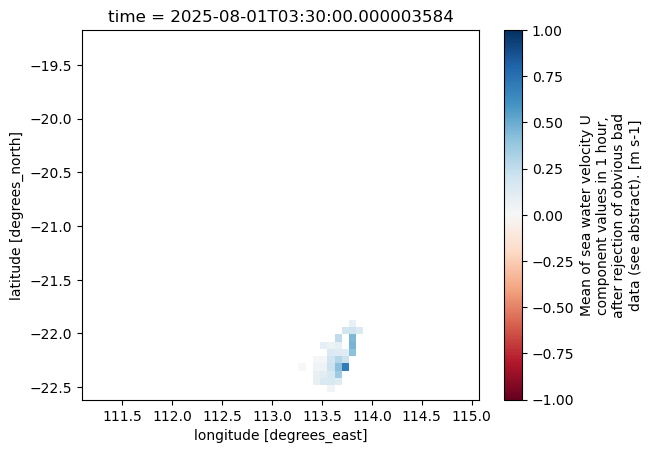

In [22]:
with dask.config.set(scheduler='threads'):
    plt.figure()
    ds.UCUR[3,...].plot(vmin=-1, vmax=1, cmap='RdBu')

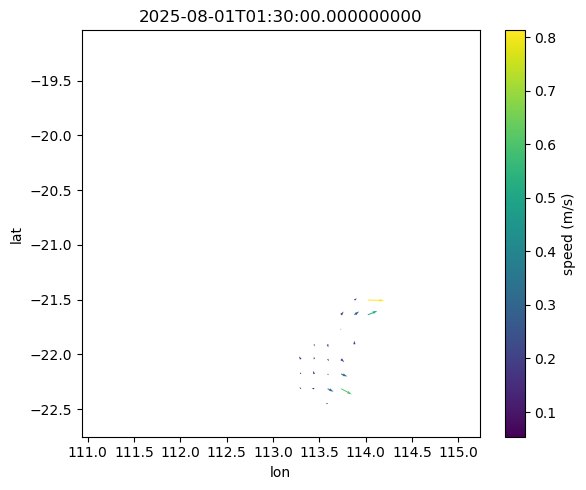

In [23]:
import numpy as np
import dask

with dask.config.set(scheduler='threads'):
    ii = 1  # 时间索引

    # 使用重命名后的坐标
    x1d = ds['lon'].values
    y1d = ds['lat'].values

    # 稀疏采样（可调）
    step = 2
    X, Y = np.meshgrid(x1d[::step], y1d[::step])

    U = ds['UCUR'].isel(time=ii).values[::step, ::step]
    V = ds['VCUR'].isel(time=ii).values[::step, ::step]

    # 屏蔽缺测，避免只有零星箭头
    spd = np.hypot(U, V)
    mask = np.isnan(spd)
    U = np.ma.array(U, mask=mask)
    V = np.ma.array(V, mask=mask)
    spd = np.ma.array(spd, mask=mask)

    plt.figure(figsize=(6,5))
    h = plt.quiver(X, Y, U, V, spd, cmap='viridis', scale=5, scale_units='inches')
    plt.colorbar(h, label='speed (m/s)')
    plt.xlabel('lon'); plt.ylabel('lat')
    plt.title(str(ds['time'].values[ii]))
    plt.tight_layout()


In [ ]:
#ncfiles = fs.glob('imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/27/*.nc')
#print(ncfiles[0]), len(ncfiles)

imos-data/IMOS/ACORN/gridded_1h-avg-current-map_QC/NWA/2025/03/27/IMOS_ACORN_V_20250327T003000Z_NWA_FV01_1-hour-avg.nc


(None, 13)

In [ ]:
#fileobjs = [fs.open(nc) for nc in ncfiles]
#ds = xr.open_mfdataset(fileobjs)
#ds

<xarray.Dataset> Size: 1MB
Dimensions:               (TIME: 13, LATITUDE: 51, LONGITUDE: 55)
Coordinates:
  * TIME                  (TIME) datetime64[ns] 104B 2025-03-27T00:29:59.9999...
  * LATITUDE              (LATITUDE) float64 408B -19.21 -19.28 ... -22.58
  * LONGITUDE             (LONGITUDE) float64 440B 111.1 111.2 ... 115.0 115.0
Data variables:
    GDOP                  (TIME, LATITUDE, LONGITUDE) float32 146kB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    UCUR                  (TIME, LATITUDE, LONGITUDE) float32 146kB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    VCUR                  (TIME, LATITUDE, LONGITUDE) float32 146kB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    UCUR_sd               (TIME, LATITUDE, LONGITUDE) float32 146kB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    VCUR_sd               (TIME, LATITUDE, LONGITUDE) float32 146kB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    NOBS1                 (TIME, LATITUDE, LONGITUDE) float32 146kB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    NOBS2                 (TIME, LATITUDE, LONGITUDE) float32 146kB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    UCUR_quality_control  (TIME, LATITUDE, LONGITUDE) float32 146kB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
    VCUR_quality_control  (TIME, LATITUDE, LONGITUDE) float32 146kB dask.array<chunksize=(1, 51, 55), meta=np.ndarray>
Attributes: (12/40)
    project:                       Integrated Marine Observing System (IMOS)
    Conventions:                   CF-1.6,IMOS-1.4
    institution:                   IMOS Ocean Radar Facility
    title:                         IMOS Ocean Radar Facility Northwest Shelf ...
    instrument:                    WERA Oceanographic HF Radar/Helzel Messtec...
    site_code:                     NWA, Northwest Australia
    ...                            ...
    citation:                      The citation in a list of references is: I...
    acknowledgement:               Any users (including re-packagers) of IMOS...
    distribution_statement:        Data may be re-used, provided that related...
    license:                       http://creativecommons.org/licenses/by/4.0/
    comment:                       This NetCDF file has been created using th...
    disclaimer:                    Data, products and services from IMOS are ...

In [26]:
import os, pathlib, dask

# 1) 确保目录存在
os.makedirs("../DATA", exist_ok=True)

# 2) 如果目标文件已存在，先删除（避免被锁时写入失败）
out_path = pathlib.Path("../DATA/IMOS_Ningaloo_HFRadar_20250327.nc")
try:
    out_path.unlink()  # Python 3.8+，文件不存在会抛错
except FileNotFoundError:
    pass
except PermissionError:
    # 如果被占用，换个名字写
    out_path = pathlib.Path("../DATA/IMOS_Ningaloo_HFRadar_20250327_new.nc")

# 3) 释放远端句柄并把数据算到内存，避免持有锁
#    （open_mfdataset 默认是懒加载+dask）
ds_local = ds.load()   # 或 ds.compute()

# 4) 写本地 NetCDF（显式 mode='w'）
with dask.config.set(scheduler="threads"):
    ds_local.to_netcdf(out_path.as_posix(), mode="w")

# 5) 关闭 Dataset（好习惯）
ds_local.close()


In [27]:
# === 替换原来的“20250327 合并保存”段：批量下载指定月份原始 nc（可选按天合并保存） ===
import os, calendar
import xarray as xr
import dask

# ---- 可配参数 ----
YEAR    = 2025
MONTHS  = [8, ]   # 想要的月份
REGION  = "NWA"    # 区域目录名（如 ROT、CWC 等，先用 fs.ls 查看）
QC_DIR  = "gridded_1h-avg-current-map_non-QC"   # 或 "gridded_1h-avg-current-map_QC"

SAVE_RAW_NC = True                 # 下载原始“小时级” nc 到本地
SAVE_DAILY_COMBINED_NC = False     # 额外：把每天合并成一个 nc 并保存

RAW_ROOT   = "../DATA/HFRadar_raw"    # 原始文件根目录
DAILY_ROOT = "../DATA/HFRadar_daily"  # 按天合并文件根目录

os.makedirs(RAW_ROOT, exist_ok=True)
os.makedirs(DAILY_ROOT, exist_ok=True)

downloaded = 0
skipped = 0
combined = 0

for mm in MONTHS:
    ndays = calendar.monthrange(YEAR, mm)[1]
    for dd in range(1, ndays + 1):
        prefix = f"imos-data/IMOS/ACORN/{QC_DIR}/{REGION}/{YEAR:04d}/{mm:02d}/{dd:02d}"
        day_files = fs.glob(f"{prefix}/*.nc")
        if not day_files:
            print(f"无数据：{YEAR}-{mm:02d}-{dd:02d}")
            continue

        # ---- 下载原始小时级 nc（保留目录层级）----
        if SAVE_RAW_NC:
            outdir = os.path.join(RAW_ROOT, REGION, f"{YEAR:04d}", f"{mm:02d}", f"{dd:02d}")
            os.makedirs(outdir, exist_ok=True)
            for key in day_files:
                fname = key.split("/")[-1]
                dst = os.path.join(outdir, fname)
                if os.path.exists(dst):
                    skipped += 1
                    # print("已存在，跳过：", dst)
                else:
                    print("下载：", key, "->", dst)
                    fs.get(key, dst)
                    downloaded += 1

        # ---- （可选）把当天所有小时合并成一个 nc 并保存 ----
        if SAVE_DAILY_COMBINED_NC:
            with dask.config.set(scheduler="threads"):
                fobjs = [fs.open(p) for p in day_files]
                ds_day = xr.open_mfdataset(fobjs, combine="by_coords", parallel=False)

            # 统一坐标名
            rename_map = {}
            if "TIME" in ds_day:      rename_map["TIME"] = "time"
            if "LATITUDE" in ds_day:  rename_map["LATITUDE"] = "lat"
            if "LONGITUDE" in ds_day: rename_map["LONGITUDE"] = "lon"
            if rename_map: ds_day = ds_day.rename(rename_map)

            day_nc_dir = os.path.join(DAILY_ROOT, REGION, f"{YEAR:04d}", f"{mm:02d}")
            os.makedirs(day_nc_dir, exist_ok=True)
            day_nc_path = os.path.join(day_nc_dir, f"ACORN_{REGION}_{YEAR}{mm:02d}{dd:02d}.nc")

            with dask.config.set(scheduler="threads"):
                ds_day.load().to_netcdf(day_nc_path, mode="w")
            ds_day.close()
            combined += 1
            print("保存合并日 nc：", day_nc_path)

print(f"完成：下载 {downloaded} 个，跳过 {skipped} 个；合并日 nc {combined} 个")
print("原始文件根目录：", os.path.abspath(RAW_ROOT))
print("日合并文件根目录：", os.path.abspath(DAILY_ROOT))


下载： imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2025/08/01/IMOS_ACORN_V_20250801T003000Z_NWA_FV00_1-hour-avg.nc -> ../DATA/HFRadar_raw\NWA\2025\08\01\IMOS_ACORN_V_20250801T003000Z_NWA_FV00_1-hour-avg.nc
下载： imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2025/08/01/IMOS_ACORN_V_20250801T013000Z_NWA_FV00_1-hour-avg.nc -> ../DATA/HFRadar_raw\NWA\2025\08\01\IMOS_ACORN_V_20250801T013000Z_NWA_FV00_1-hour-avg.nc
下载： imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2025/08/01/IMOS_ACORN_V_20250801T023000Z_NWA_FV00_1-hour-avg.nc -> ../DATA/HFRadar_raw\NWA\2025\08\01\IMOS_ACORN_V_20250801T023000Z_NWA_FV00_1-hour-avg.nc
下载： imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2025/08/01/IMOS_ACORN_V_20250801T033000Z_NWA_FV00_1-hour-avg.nc -> ../DATA/HFRadar_raw\NWA\2025\08\01\IMOS_ACORN_V_20250801T033000Z_NWA_FV00_1-hour-avg.nc
下载： imos-data/IMOS/ACORN/gridded_1h-avg-current-map_non-QC/NWA/2025/08/01/IMOS_ACORN_V_20250801T043000Z_NWA_FV00_1-hour-avg.nc -

In [28]:
# 模块18：从本地 RAW_ROOT 读取下载好的 nc，绘制 PNG 并按月合成 GIF
import os, glob, numpy as np, xarray as xr, dask, imageio.v2 as imageio
import matplotlib.pyplot as plt
import cartopy.crs as ccrs, cartopy.feature as cfeature
import cmocean
from calendar import monthrange

# 复用你在第16模块里设定的 YEAR / MONTHS / REGION / RAW_ROOT
# 这里也可以按需改图幅与采样
x1, x2 = 111, 114
y1, y2 = -25.0, -20.0
step   = 1  # 箭头网格稀疏采样（1 更密，2 更快）

OUT_DIR = f"../FIGURES/HFRadar_local_{YEAR}_{'_'.join([f'{m:02d}' for m in MONTHS])}"
os.makedirs(OUT_DIR, exist_ok=True)

def rename_coords(ds: xr.Dataset) -> xr.Dataset:
    m = {}
    if "TIME" in ds:      m["TIME"] = "time"
    if "LATITUDE" in ds:  m["LATITUDE"] = "lat"
    if "LONGITUDE" in ds: m["LONGITUDE"] = "lon"
    return ds.rename(m) if m else ds

def plot_timeslice(ds: xr.Dataset, ti: int, png_path: str):
    lon_1d = ds["lon"].values[::step]
    lat_1d = ds["lat"].values[::step]
    X, Y = np.meshgrid(lon_1d, lat_1d)

    U = ds["UCUR"].isel(time=ti).values[::step, ::step]
    V = ds["VCUR"].isel(time=ti).values[::step, ::step]
    spd = np.hypot(U, V)

    # 屏蔽 NaN
    mask = np.isnan(spd)
    U_m = np.ma.array(U, mask=mask)
    V_m = np.ma.array(V, mask=mask)
    spd_m = np.ma.array(spd, mask=mask)

    fig, ax = plt.subplots(figsize=(7.2, 7.8), subplot_kw={"projection": ccrs.PlateCarree()})
    ax.set_extent([x1, x2, y1, y2], crs=ccrs.PlateCarree())
    ax.coastlines("10m")
    ax.add_feature(cfeature.LAND, facecolor="lightgray", edgecolor="none", alpha=0.7)
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
    gl.right_labels = False; gl.top_labels = False

    Q = ax.quiver(
        X, Y, U_m, V_m, spd_m,
        transform=ccrs.PlateCarree(),
        cmap=cmocean.cm.speed,
        scale=5, scale_units="inches", pivot="middle", linewidths=0.2
    )
    cb = plt.colorbar(Q, ax=ax, shrink=0.7, pad=0.02)
    cb.set_label("surface current speed (m/s)")

    ts = np.datetime_as_string(ds["time"].values[int(ti)], unit="m")
    ax.set_title(f"HF Radar Currents — {ts} UTC")
    plt.tight_layout()
    plt.savefig(png_path, dpi=150)
    plt.close(fig)

for mm in MONTHS:
    print(f"\n=== 本地绘图 {YEAR}-{mm:02d} ===")
    month_pngs = []

    for dd in range(1, monthrange(YEAR, mm)[1] + 1):
        # 从本地 RAW_ROOT 找到当天下载的所有小时 nc
        local_glob = os.path.join(RAW_ROOT, REGION, f"{YEAR:04d}", f"{mm:02d}", f"{dd:02d}", "*.nc")
        local_files = sorted(glob.glob(local_glob))
        if not local_files:
            # print(f"  无本地数据：{YEAR}-{mm:02d}-{dd:02d}")
            continue

        try:
            # 用本地文件构建数据集（懒加载）
            with dask.config.set(scheduler="threads"):
                ds = xr.open_mfdataset(local_files, combine="by_coords", parallel=False)

            ds = rename_coords(ds)

            # 变量存在性检查
            for v in ("UCUR", "VCUR"):
                if v not in ds:
                    raise ValueError(f"{YEAR}-{mm:02d}-{dd:02d} 缺少变量 {v}")

            # 裁剪研究区
            ds = ds.sel(lon=slice(x1, x2), lat=slice(y2, y1))

            # 找有效时间步
            valid_idx = np.where(np.isfinite(ds["UCUR"]).any(dim=("lat", "lon")).values)[0]
            if len(valid_idx) == 0:
                print(f"  {YEAR}-{mm:02d}-{dd:02d} 裁剪范围内全 NaN，跳过")
                ds.close(); continue

            # 逐时间步绘图
            for ti in valid_idx:
                ts = np.datetime_as_string(ds["time"].values[int(ti)], unit="m").replace(":", "")
                png_path = os.path.join(OUT_DIR, f"HFRadar_currents_{ts}.png")
                plot_timeslice(ds, int(ti), png_path)
                month_pngs.append(png_path)

            ds.close()

        except Exception as e:
            print(f"  {YEAR}-{mm:02d}-{dd:02d} 出错：{e}")

    # 合成当月 GIF
    if month_pngs:
        gif_path = os.path.join(OUT_DIR, f"HFRadar_{YEAR}-{mm:02d}.gif")
        with imageio.get_writer(gif_path, mode="I", duration=0.4, loop=0) as w:
            for p in sorted(month_pngs):
                w.append_data(imageio.imread(p))
        print(f"  ✅ 本地 GIF 保存：{gif_path}")
    else:
        print(f"  ⚠️ {YEAR}-{mm:02d} 未生成 PNG（当月无数据或范围外）")

print("\n完成。输出目录：", os.path.abspath(OUT_DIR))



=== 本地绘图 2025-08 ===
  ✅ 本地 GIF 保存：../FIGURES/HFRadar_local_2025_08\HFRadar_2025-08.gif

完成。输出目录： c:\Users\13217\Desktop\mnf_ningaloo_2026-main\FIGURES\HFRadar_local_2025_08
